<a href="https://colab.research.google.com/github/grale13/cursoad/blob/main/Leopoldo_Granados_Actividad_de_archivos_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio - Tratado de CSV**
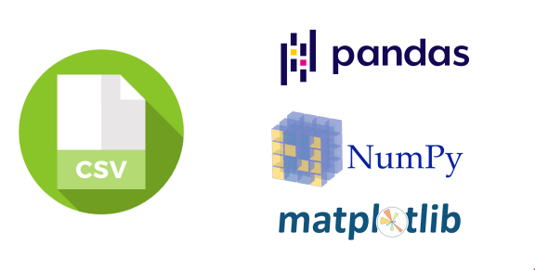

# 1.-Importar Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Importar el archivo CSV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Data path 
dataset_path = '/content/drive/MyDrive/insurance.csv'

## 3. Convertir el CSV a un Dataframe

In [4]:
#Dataset:
df = pd.read_csv(dataset_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 4. Analizar si la data tienes valores NO deseados como NaN NR

In [5]:
df[df.isna().any(axis=1)]




,age,sex,bmi,children,smoker,region,charges


## 5. Aplicar Estadisticas básicas

In [6]:
df.describe(include='all')



,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 6. Generar nuevas columnas a partir de las ya exitentes

In [13]:
# Para calcular la edad real de las personas vamos a multiplicar su edad por el número de hijos que tienen
# ... es sólo una suposición

df["real age"] = df["age"] * df['children']
df.head()



,age,sex,bmi,children,smoker,region,charges,real age
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,18
2,28,male,33.000,3,no,southeast,4449.46200,84
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


## 7. Realizar Alguna agrupación que sea de interes 

In [8]:
df.groupby(by = ["smoker"]).mean()

,age,bmi,children,charges,real age
smoker,,,,,
no,39.385338,30.651795,1.090226,8434.268298,43.511278
yes,38.514599,30.708449,1.113139,32050.231832,44.175182


## 8. Realizar una graficación de la agrupación previamente realizada

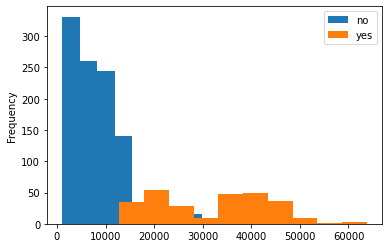

In [9]:
# Vemos en la gráfica que los costos de pólizas de seguro son más altos para personas que fuman

ax = df.groupby('smoker')['charges'].plot(kind='hist', legend=True, xlabel='charges')

## 9. Guardar en un documento la tabla que procesada

In [10]:
df.to_csv(r'/content/drive/MyDrive/Insurance_modified.csv', index = False)


In [12]:
# Se muestra que el archivo efectivamente fue guardado
!ls /content/drive/MyDrive/Insu*

/content/drive/MyDrive/Insurance_modified.csv
